In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
os.chdir("C:\\Users\\Adhvaidh\\Desktop\\DL deployment")
ds = pd.read_csv("GBP_INR train.csv")

In [2]:
ds.head()

,Date,Price,Open,High,Low,Change %
0,"May 15, 2002",71.575,70.929,71.575,70.802,0.78%
1,"May 16, 2002",71.356,71.462,71.764,71.159,-0.31%
2,"May 17, 2002",71.405,71.252,71.666,71.198,0.07%
3,"May 20, 2002",71.478,71.510,71.811,71.320,0.10%
4,"May 21, 2002",71.475,71.398,71.607,71.061,0.00%


In [3]:
ds = ds.iloc[:, 1:2].values
ds

array([[ 71.575],
       [ 71.356],
       [ 71.405],
       ...,
       [102.115],
       [102.41 ],
       [102.421]])

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
ds_sc = sc.fit_transform(ds)

In [5]:
X_train = []
y_train = []
for i in range(60, len(ds_sc)):
    X_train.append(ds_sc[i-60:i, 0])
    y_train.append(ds_sc[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [6]:
X_train.shape

(4906, 60)

In [7]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#as input format for RNN is (batchsize, timeSteps, input dimension)

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [9]:
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 60, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 60, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 60, return_sequences = True))
regressor.add(Dropout(0.2))


regressor.add(LSTM(units = 60, return_sequences = True))
regressor.add(Dropout(0.2))


regressor.add(LSTM(units = 60, return_sequences = True))
regressor.add(Dropout(0.2))

#Output layer
regressor.add(Dense(units = 1))

In [10]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 60)            14880     
_________________________________________________________________
dropout (Dropout)            (None, 60, 60)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 60)            29040     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 60)            29040     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 60, 60)            2

In [11]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [12]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 150, batch_size = 30, verbose=1)

Epoch 1/150
164/164 [==============================] - 22s 83ms/step - loss: 0.0574
Epoch 2/150
164/164 [==============================] - 16s 97ms/step - loss: 0.0132
Epoch 3/150
164/164 [==============================] - 16s 98ms/step - loss: 0.0098
Epoch 4/150
164/164 [==============================] - 21s 128ms/step - loss: 0.0085
Epoch 5/150
164/164 [==============================] - 19s 117ms/step - loss: 0.0073
Epoch 6/150
164/164 [==============================] - 20s 120ms/step - loss: 0.0069
Epoch 7/150
164/164 [==============================] - 20s 121ms/step - loss: 0.0067
Epoch 8/150
164/164 [==============================] - 21s 125ms/step - loss: 0.0062
Epoch 9/150
164/164 [==============================] - 22s 136ms/step - loss: 0.0059
Epoch 10/150
164/164 [==============================] - 21s 125ms/step - loss: 0.0059
Epoch 11/150
164/164 [==============================] - 21s 127ms/step - loss: 0.0060
Epoch 12/150
164/164 [==============================] - 21s 129ms/

164/164 [==============================] - 22s 132ms/step - loss: 0.0049
Epoch 97/150
164/164 [==============================] - 22s 136ms/step - loss: 0.0044
Epoch 98/150
164/164 [==============================] - 22s 135ms/step - loss: 0.0046
Epoch 99/150
164/164 [==============================] - 22s 135ms/step - loss: 0.0045
Epoch 100/150
164/164 [==============================] - 22s 133ms/step - loss: 0.0045
Epoch 101/150
164/164 [==============================] - 22s 134ms/step - loss: 0.0043
Epoch 102/150
164/164 [==============================] - 22s 135ms/step - loss: 0.0044
Epoch 103/150
164/164 [==============================] - 22s 133ms/step - loss: 0.0045
Epoch 104/150
164/164 [==============================] - 22s 135ms/step - loss: 0.0044
Epoch 105/150
164/164 [==============================] - 22s 136ms/step - loss: 0.0045
Epoch 106/150
164/164 [==============================] - 22s 134ms/step - loss: 0.0044
Epoch 107/150
164/164 [==============================] - 22s

In [13]:
dataset_test = pd.read_csv('GBP INR test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [14]:
ds_train = pd.read_csv("GBP_INR train.csv")

In [20]:
dataset_total = pd.concat((ds_train['Price'], dataset_test['Price']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


ValueError: Found array with dim 3. Estimator expected <= 2.

In [18]:
predicted_stock_price

array([[[0.8086604 ],
        [0.82725155],
        [0.82591975],
        ...,
        [0.88890946],
        [0.8922514 ],
        [0.89397204]],

       [[0.8112734 ],
        [0.823781  ],
        [0.8328934 ],
        ...,
        [0.8913082 ],
        [0.8929064 ],
        [0.89743745]],

       [[0.8097033 ],
        [0.83364165],
        [0.8313945 ],
        ...,
        [0.89281285],
        [0.897408  ],
        [0.90056   ]],

       ...,

       [[0.8177296 ],
        [0.83668417],
        [0.8395393 ],
        ...,
        [0.8907194 ],
        [0.89225334],
        [0.8886366 ]],

       [[0.816233  ],
        [0.83702224],
        [0.8423072 ],
        ...,
        [0.89140224],
        [0.88788605],
        [0.88911176]],

       [[0.81643546],
        [0.8423874 ],
        [0.8455726 ],
        ...,
        [0.88696903],
        [0.888036  ],
        [0.8834853 ]]], dtype=float32)

In [19]:
sc.inverse_transform(predicted_stock_price)

ValueError: Found array with dim 3. Estimator expected <= 2.

In [16]:
predicted_stock_price

array([[102.48564 ],
       [102.8134  ],
       [103.07985 ],
       [103.1015  ],
       [102.955376],
       [102.99273 ],
       [103.70819 ],
       [103.82532 ],
       [103.81153 ],
       [103.44731 ],
       [103.48453 ],
       [103.420746],
       [103.28808 ],
       [103.27657 ],
       [103.10355 ],
       [102.70437 ],
       [102.77542 ],
       [102.65299 ],
       [102.693954],
       [102.52104 ]], dtype=float32)

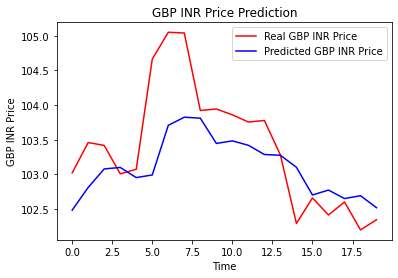

In [17]:
plt.plot(real_stock_price, color = 'red', label = 'Real GBP INR Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted GBP INR Price')
plt.title('GBP INR Price Prediction')
plt.xlabel('Time')
plt.ylabel('GBP INR Price')
plt.legend()
plt.show()

In [19]:
from keras.models import load_model

regressor.save('gbp_model_1.h5')